In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
!ls

data_description.txt  sample_data  sample_submission.csv  test.csv  train.csv


In [ ]:
open('train.csv').readlines(2)

['Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n']

In [ ]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
838,839,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,144000
455,456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
169,170,20,RL,NaN,16669,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,228000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
279,280,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,192000
1174,1175,70,RL,80.0,16560,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,239000
905,906,20,RL,80.0,9920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128000
1063,1064,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,110500
1197,1198,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal,144000
584,585,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,133000


In [ ]:
df.iloc[10]

,10
Id,11
MSSubClass,20
MSZoning,RL
LotFrontage,70.0
LotArea,11200
...,...
MoSold,2
YrSold,2008
SaleType,WD
SaleCondition,Normal


In [ ]:
len(df)

1460

<Axes: >

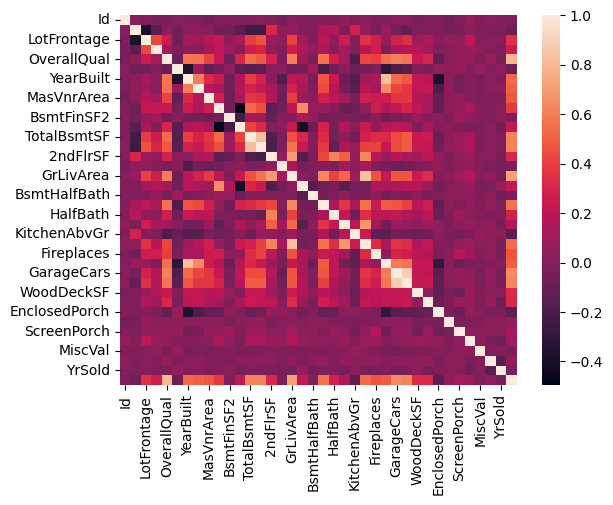

In [ ]:
corr_matrix = df.corr(numeric_only= True)
sns.heatmap(corr_matrix)

In [ ]:
a = 0
b = 0
c = 0
for i in corr_matrix.columns:
  for j in corr_matrix.index:
    if corr_matrix.loc[j,i] > a and corr_matrix.loc[j,i] != 1:
      a = corr_matrix.loc[j,i]
      b = i
      c = j

print(a, b, c)

0.882475414281462 GarageCars GarageArea


<Axes: ylabel='Frequency'>

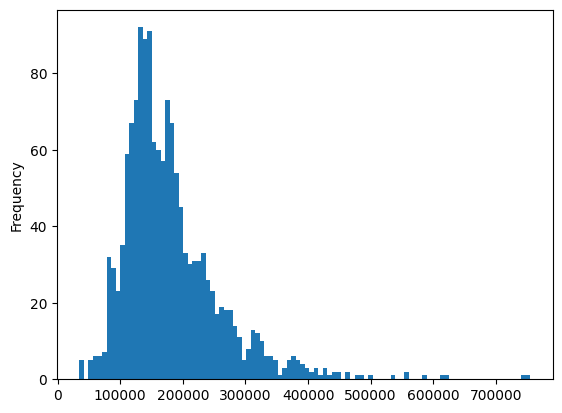

In [ ]:
df.SalePrice.plot.hist(bins = 100)

<Axes: ylabel='Frequency'>

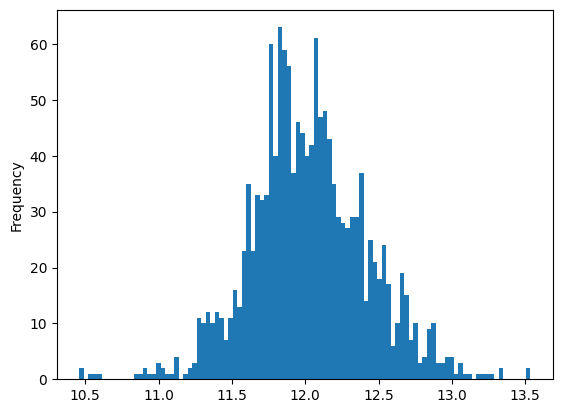

In [ ]:
p = df.SalePrice.apply(np.log)
p.plot.hist(bins = 100)

In [ ]:
price_corr = df.corr(numeric_only= True).SalePrice
price_corr[abs(price_corr) > 0.5]

,SalePrice
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
FullBath,0.560664
TotRmsAbvGrd,0.533723
GarageCars,0.640409
GarageArea,0.623431


In [ ]:
top_features = price_corr[abs(price_corr) > 0.5].index
top_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<Axes: >

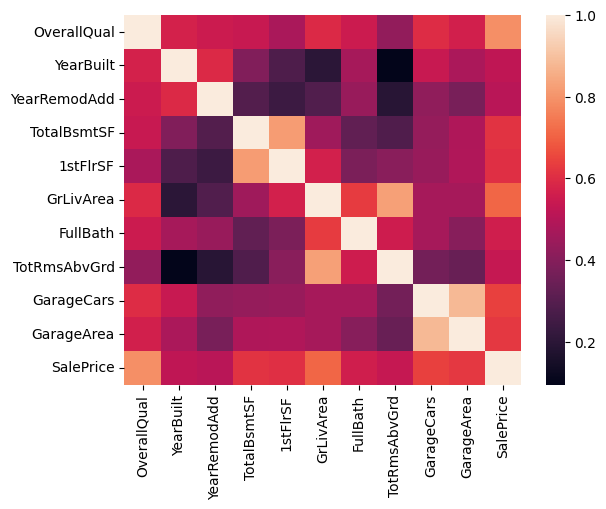

In [ ]:
sns.heatmap(df[top_features].corr(numeric_only= True))

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

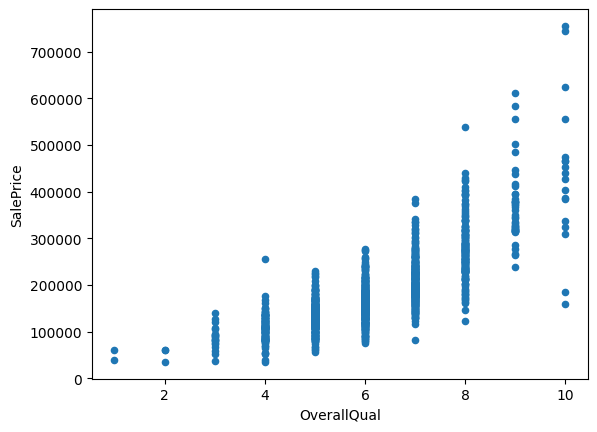

In [ ]:
df.plot.scatter('OverallQual', 'SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

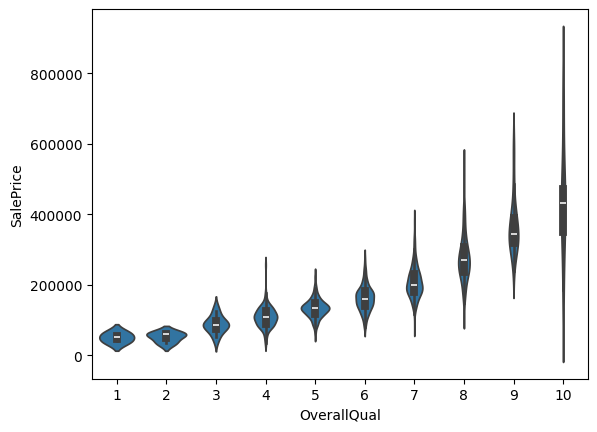

In [ ]:
sns.violinplot(x = 'OverallQual', y = 'SalePrice', data = df)

In [ ]:
df[df.OverallQual==10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [ ]:
cat_variables = df.select_dtypes(include = 'object')
cat_variables

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
cat_variables = pd.get_dummies(cat_variables).astype(int)
cat_variables

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
cat_variables = pd.concat([cat_variables, df["SalePrice"]], axis=1)

In [ ]:
cat_variables

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,208500
1,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,181500
2,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,223500
3,0,0,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,140000
4,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,175000
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,210000
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,266500
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,142125


In [ ]:
price_corr_cat = cat_variables.corr(numeric_only= True).SalePrice
price_corr_cat[abs(price_corr_cat) > 0.5]

,SalePrice
ExterQual_TA,-0.589044
BsmtQual_Ex,0.553105
KitchenQual_Ex,0.504094
KitchenQual_TA,-0.519298
SalePrice,1.000000


In [ ]:
top_cat_features = price_corr_cat[abs(price_corr_cat) > 0.5].index
top_cat_features

Index(['ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA',
       'SalePrice'],
      dtype='object')

<Axes: >

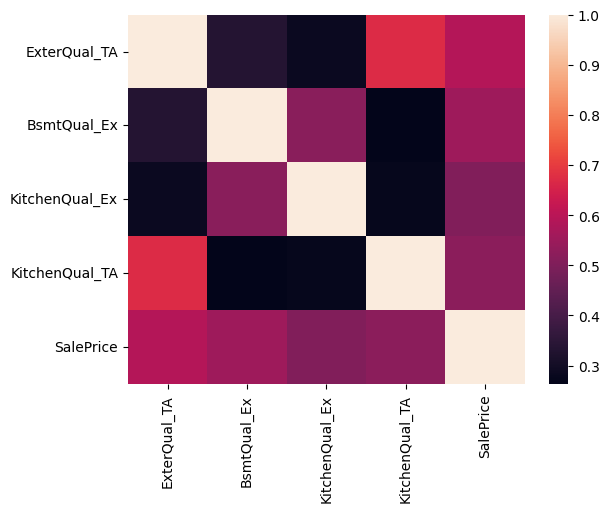

In [ ]:
sns.heatmap(cat_variables[top_cat_features].corr(numeric_only= True).abs())

In [ ]:
final_df = pd.concat([df[top_features], cat_variables[top_cat_features]], axis=1)
final_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500,0,0,0,0,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,1,0,0,1,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500,0,0,0,0,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000,1,0,0,0,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,1,0,0,1,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,1,0,0,1,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,0,0,0,0,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,1,0,0,0,142125


In [ ]:
X = final_df.drop(columns=["SalePrice"])
y = final_df["SalePrice"]
y = y.T.drop_duplicates().T
y = y.values.ravel()

y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 18798.76
Root Mean Squared Error (RMSE): 29361.07
R² Score: 0.89
